In [30]:
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

In [31]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [32]:
print('Shapes : train=%s, test=%s' % (train_images.shape, test_images.shape))
print('Labels : train=%s, test=%s' % (train_labels, test_labels))

Shapes : train=(60000, 28, 28), test=(10000, 28, 28)
Labels : train=[5 0 4 ... 5 6 8], test=[7 2 1 ... 4 5 6]


In [33]:
df = pd.DataFrame(train_images[0])
print(df.to_string()) 

    0   1   2   3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23  24  25  26  27
0    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0
1    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0
2    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0
3    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0
4    0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0
5    0   0   0   0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127   0   0   0   0
6    0   0   0   0    0    0    0    0   30   36   94  

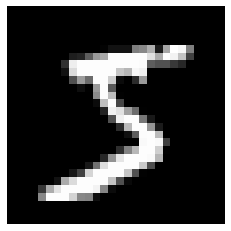

In [34]:
plt.axis('off')
plt.imshow(train_images[0], cmap = 'gray')

In [35]:
def randomm_list(length, start, end):
  r = []
  for i in range(length):
    r.append(random.randint(start, end))
  return r

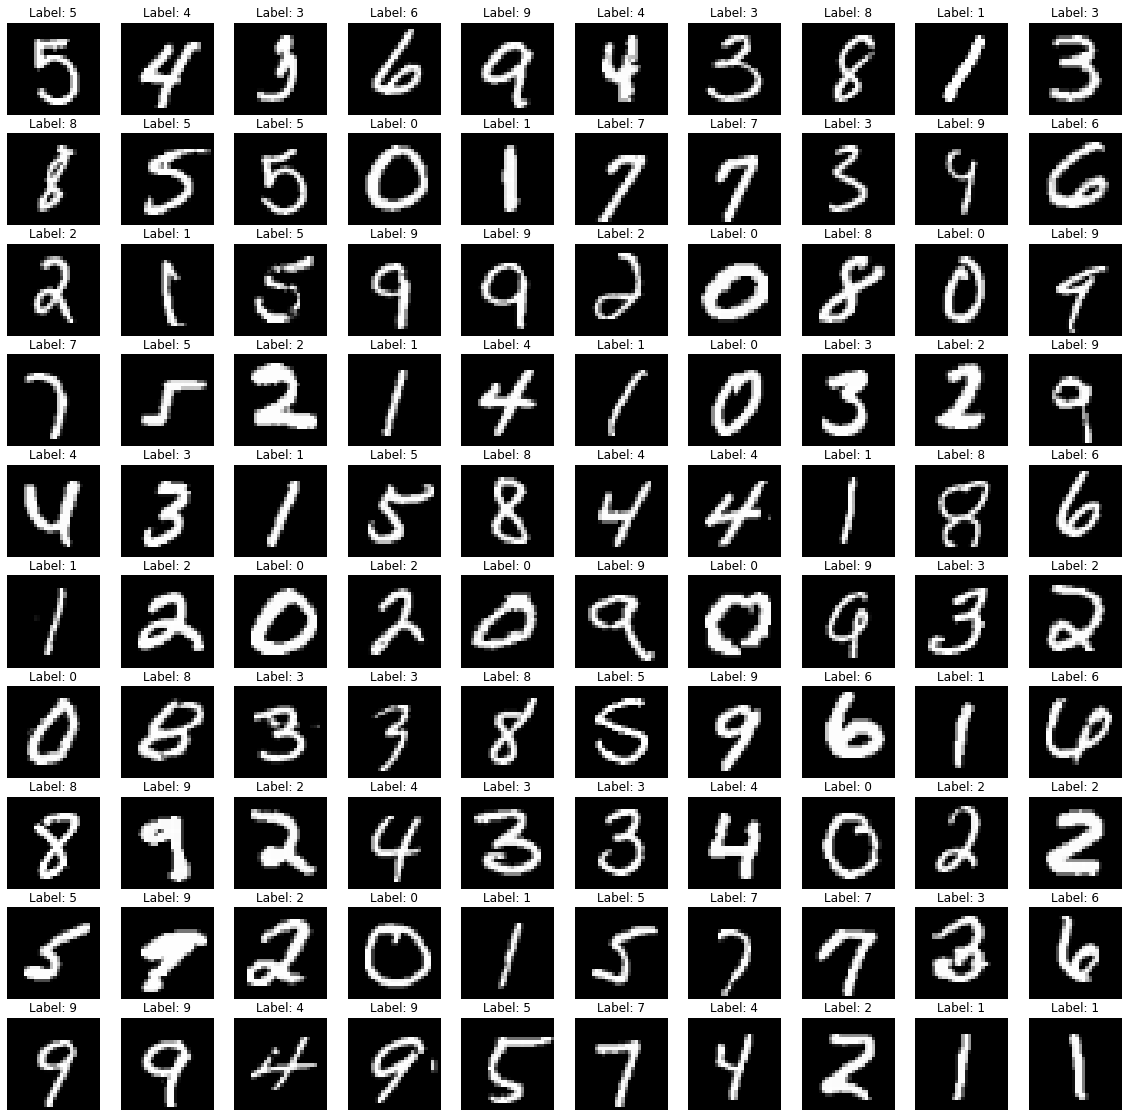

In [36]:
r = randomm_list(100, 0, 60000)
fig, axes = plt.subplots(10, 10, figsize = (20, 20))
for i, (j, ax) in zip(r, enumerate(axes.flat)):
    ax.axis('off')
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: %d' % train_labels[i])

In [37]:
train_images = train_images/255
test_images = test_images/255

In [38]:
model = Sequential(
    [
        Flatten(input_shape=(28,28), name = 'input_layer'),
        Dense(128, activation='relu', name = 'first_hidden_layer'),
        Dense(32, activation='relu', name = 'second_hidden_layer'),
        Dense(10, activation='softmax', name = 'output_layer')
    ]
)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 first_hidden_layer (Dense)  (None, 128)               100480    
                                                                 
 second_hidden_layer (Dense)  (None, 32)               4128      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [40]:
print((model.get_layer('output_layer').weights))
print((model.get_layer('output_layer').bias))

[<tf.Variable 'output_layer/kernel:0' shape=(32, 10) dtype=float32, numpy=
array([[ 0.01716343, -0.14532799,  0.1007131 ,  0.06333628, -0.20462084,
         0.31179544,  0.3377259 ,  0.20729235,  0.26340213, -0.07512784],
       [ 0.36851135, -0.08632961,  0.07799867,  0.1357607 ,  0.2866865 ,
         0.1798127 , -0.05234069,  0.14376494,  0.1457791 ,  0.30761376],
       [ 0.26160994,  0.02428034,  0.3449678 , -0.17759302, -0.28200424,
        -0.19276476,  0.09635457,  0.07315913,  0.01701835,  0.2768596 ],
       [ 0.16592357, -0.05889681, -0.30553663,  0.00694281,  0.10413474,
         0.20128837, -0.18083009,  0.05005962, -0.23928715, -0.06541267],
       [-0.21279065,  0.25311807, -0.23855327, -0.06173089, -0.16878936,
        -0.00842202, -0.1833686 , -0.30824327, -0.19528975, -0.16905285],
       [ 0.06019995,  0.1156365 ,  0.1404477 , -0.11112052,  0.3420259 ,
         0.20388946,  0.21038094,  0.02646685,  0.34955016,  0.36758104],
       [-0.16843188,  0.04660881, -0.007437

In [41]:
model.compile(
    optimizer='Adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [42]:
metrics = model.fit(
    train_images,
    train_labels,
    epochs = 5,
    validation_split = 0.2
)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2903 - accuracy: 0.9150 - val_loss: 0.1568 - val_accuracy: 0.9549
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1223 - accuracy: 0.9631 - val_loss: 0.1203 - val_accuracy: 0.9641
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0843 - accuracy: 0.9735 - val_loss: 0.1064 - val_accuracy: 0.9696
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0631 - accuracy: 0.9796 - val_loss: 0.0927 - val_accuracy: 0.9738
Epoch 5/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0499 - accuracy: 0.9835 - val_loss: 0.0902 - val_accuracy: 0.9753


In [43]:
print((model.get_layer('output_layer').weights))
print((model.get_layer('output_layer').bias))

[<tf.Variable 'output_layer/kernel:0' shape=(32, 10) dtype=float32, numpy=
array([[-0.03862347, -0.2153241 ,  0.18439378,  0.12430824, -0.4631707 ,
         0.41883433,  0.42193773, -0.0086404 ,  0.35584348, -0.22025253],
       [ 0.42479858, -0.2615484 , -0.07478722,  0.07655299,  0.31880465,
         0.14693037, -0.1539834 ,  0.1164785 ,  0.1997484 ,  0.35492477],
       [ 0.3381216 , -0.11380139,  0.51810217, -0.25402552, -0.40200034,
        -0.33057457,  0.1236688 ,  0.0593456 ,  0.03870311,  0.13324867],
       [ 0.1807691 , -0.3486241 , -0.5724225 , -0.02375437,  0.1729857 ,
         0.34383014, -0.11596008,  0.10405079, -0.46182883, -0.11359942],
       [-0.35982144,  0.34828365, -0.29705846,  0.00250075, -0.24742997,
         0.1266059 , -0.16215132, -0.6057964 , -0.20438384, -0.22519954],
       [-0.03392898,  0.11755574,  0.18084288, -0.20800126,  0.37282488,
         0.19143698,  0.24853465, -0.18494667,  0.40672654,  0.38733134],
       [-0.16307382,  0.07589084,  0.061979

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9768


In [45]:
labels_prob = model.predict(test_images)
labels_pred = labels_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


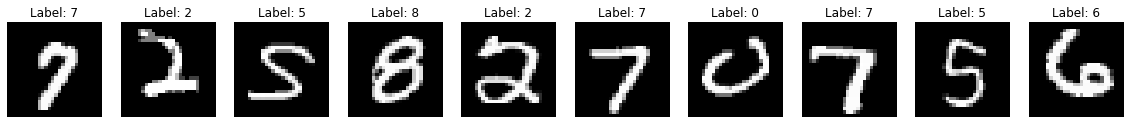

In [46]:
r = randomm_list(10, 0, 10000)
fig, axes = plt.subplots(1, 10, figsize = (20, 20))
for i, (j, ax) in zip(r, enumerate(axes.flat)):
    ax.axis('off')
    ax.imshow(test_images[i], cmap='gray')
    ax.set_title('Label: %d' % labels_pred[i])

In [47]:
df = pd.DataFrame(metrics.history)
print(df)

       loss  accuracy  val_loss  val_accuracy
0  0.290259  0.914979  0.156769      0.954917
1  0.122315  0.963146  0.120296      0.964083
2  0.084293  0.973521  0.106432      0.969583
3  0.063056  0.979625  0.092716      0.973833
4  0.049940  0.983500  0.090249      0.975333


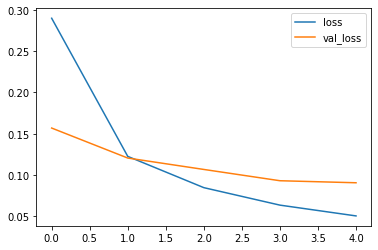

In [48]:
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

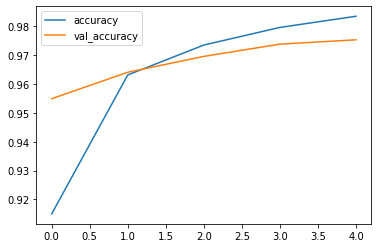

In [49]:
plt.plot(metrics.history['accuracy'])
plt.plot(metrics.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()